In [1]:
# import required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
# load the dataset
df = pd.read_csv('dataset/product_sales.csv')

In [3]:
# visualize the dataframe 
df.head(5)

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
0,2,Email,2e72d641-95ac-497b-bbf8-4861764a7097,10,NaN,0,24,Arizona
1,6,Email + Call,3998a98d-70f5-44f7-942e-789bb8ad2fe7,15,225.47,1,28,Kansas
2,5,Call,d1de9884-8059-4065-b10f-86eef57e4a44,11,52.55,6,26,Wisconsin
3,4,Email,78aa75a4-ffeb-4817-b1d0-2f030783c5d7,11,NaN,3,25,Indiana
4,3,Email,10e6d446-10a5-42e5-8210-1b5438f70922,9,90.49,0,28,Illinois


In [4]:
# detect missing values 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   week               15000 non-null  int64  
 1   sales_method       15000 non-null  object 
 2   customer_id        15000 non-null  object 
 3   nb_sold            15000 non-null  int64  
 4   revenue            13926 non-null  float64
 5   years_as_customer  15000 non-null  int64  
 6   nb_site_visits     15000 non-null  int64  
 7   state              15000 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 937.6+ KB


Missing values in revenue columns.

In [5]:
# detect the unique values 
df.nunique()

week                     6
sales_method             5
customer_id          15000
nb_sold                 10
revenue               6743
years_as_customer       42
nb_site_visits          27
state                   50
dtype: int64

There are three sales_methods namely "Email", "Call" and "Email + Call". What are two additional values?

In [6]:
# detect the sales_methods columns 
df['sales_method'].value_counts()

Email           7456
Call            4962
Email + Call    2549
em + call         23
email             10
Name: sales_method, dtype: int64

Oh! There are two different formats. 
em + call = 23 and email = 10. 
We need to convert them into the predefined format.

In [7]:
# first, let's format the sales_method column correctly 
df['sales_method'] = df['sales_method'].replace({'em + call':'Email + Call', 'email' : 'Email'})

In [8]:
# check the sales_methods columns again
df['sales_method'].value_counts()

Email           7466
Call            4962
Email + Call    2572
Name: sales_method, dtype: int64

In [9]:
# now, fill the null values in the revenue columns 
# detect the number of missing values in revenue column
df['revenue'].isna().sum()

1074

In [10]:
# droping 1074 rows will impact badly to our decision 
# lets fill with the mean value of the revenue column 
df['revenue'].fillna(np.mean(df['revenue']), inplace=True)

In [11]:
# check the number of missing values in revenue column again
df['revenue'].isna().sum()

0

In [12]:
# check the dataframe again
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   week               15000 non-null  int64  
 1   sales_method       15000 non-null  object 
 2   customer_id        15000 non-null  object 
 3   nb_sold            15000 non-null  int64  
 4   revenue            15000 non-null  float64
 5   years_as_customer  15000 non-null  int64  
 6   nb_site_visits     15000 non-null  int64  
 7   state              15000 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 937.6+ KB


In [13]:
# check the years as customer column 
# since it is 2023, it should be 39 years when a pearson being a customer since 1984 

df[df['years_as_customer'] > 39]

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
13741,2,Email,18919515-a618-430c-9a05-2c7d8fea96af,10,97.22,63,24,California
13800,4,Call,2ea97d34-571d-4e1b-95be-fea1c404649f,10,50.47,47,27,California


Oh! There are two customers more than the threshold. 

In [14]:
# removing these two observations won't affect much, so,
# exclude these two customers
df = df[df['years_as_customer'] <= 39]

In [15]:
# recheck the no. of observations again
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14998 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   week               14998 non-null  int64  
 1   sales_method       14998 non-null  object 
 2   customer_id        14998 non-null  object 
 3   nb_sold            14998 non-null  int64  
 4   revenue            14998 non-null  float64
 5   years_as_customer  14998 non-null  int64  
 6   nb_site_visits     14998 non-null  int64  
 7   state              14998 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 1.0+ MB


### Explanatory Data Analysis

#### Customer Analysis 

We can get a general idea of how long our client base has been involved by observing the distribution of the number of years that customers have been purchasing from our business.

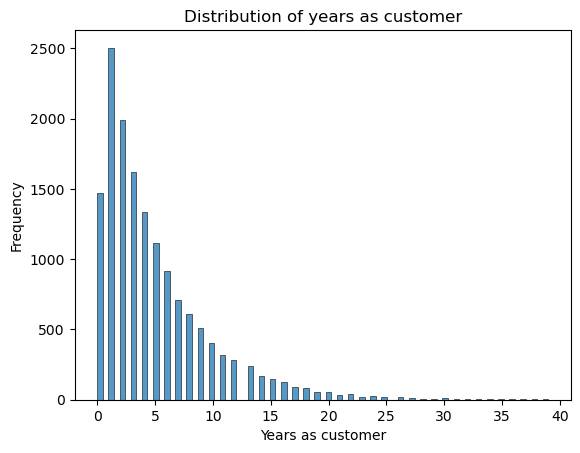

In [16]:
fig = sns.histplot(x='years_as_customer', data=df)
fig.set_title('Distribution of years as customer');
fig.set_xlabel('Years as customer');
fig.set_ylabel('Frequency');
plt.savefig('Distribution of years as customer.jpg', dpi = 300)

The distribution of customers according to the number of years they have been as customers is positively skewed. As a result, a greater proportion of customers with fewer years of participation are concentrated till 5 years, and the number of customers declines as the number of years grows from 6 through 20 years. 

#### Geographical Analysis 

To understand the sales patterns across different states, I also perform a geographical analysis based on the states where our customers reside. 

In [17]:
# count the states in the dataset 
state_counts = df['state'].value_counts()
# display the first five rows & last five rows
print(state_counts.head(5))
print(state_counts.tail(5))

California    1870
Texas         1187
New York       965
Florida        904
Illinois       617
Name: state, dtype: int64
Alaska          40
Delaware        34
Wyoming         33
North Dakota    30
Vermont         28
Name: state, dtype: int64


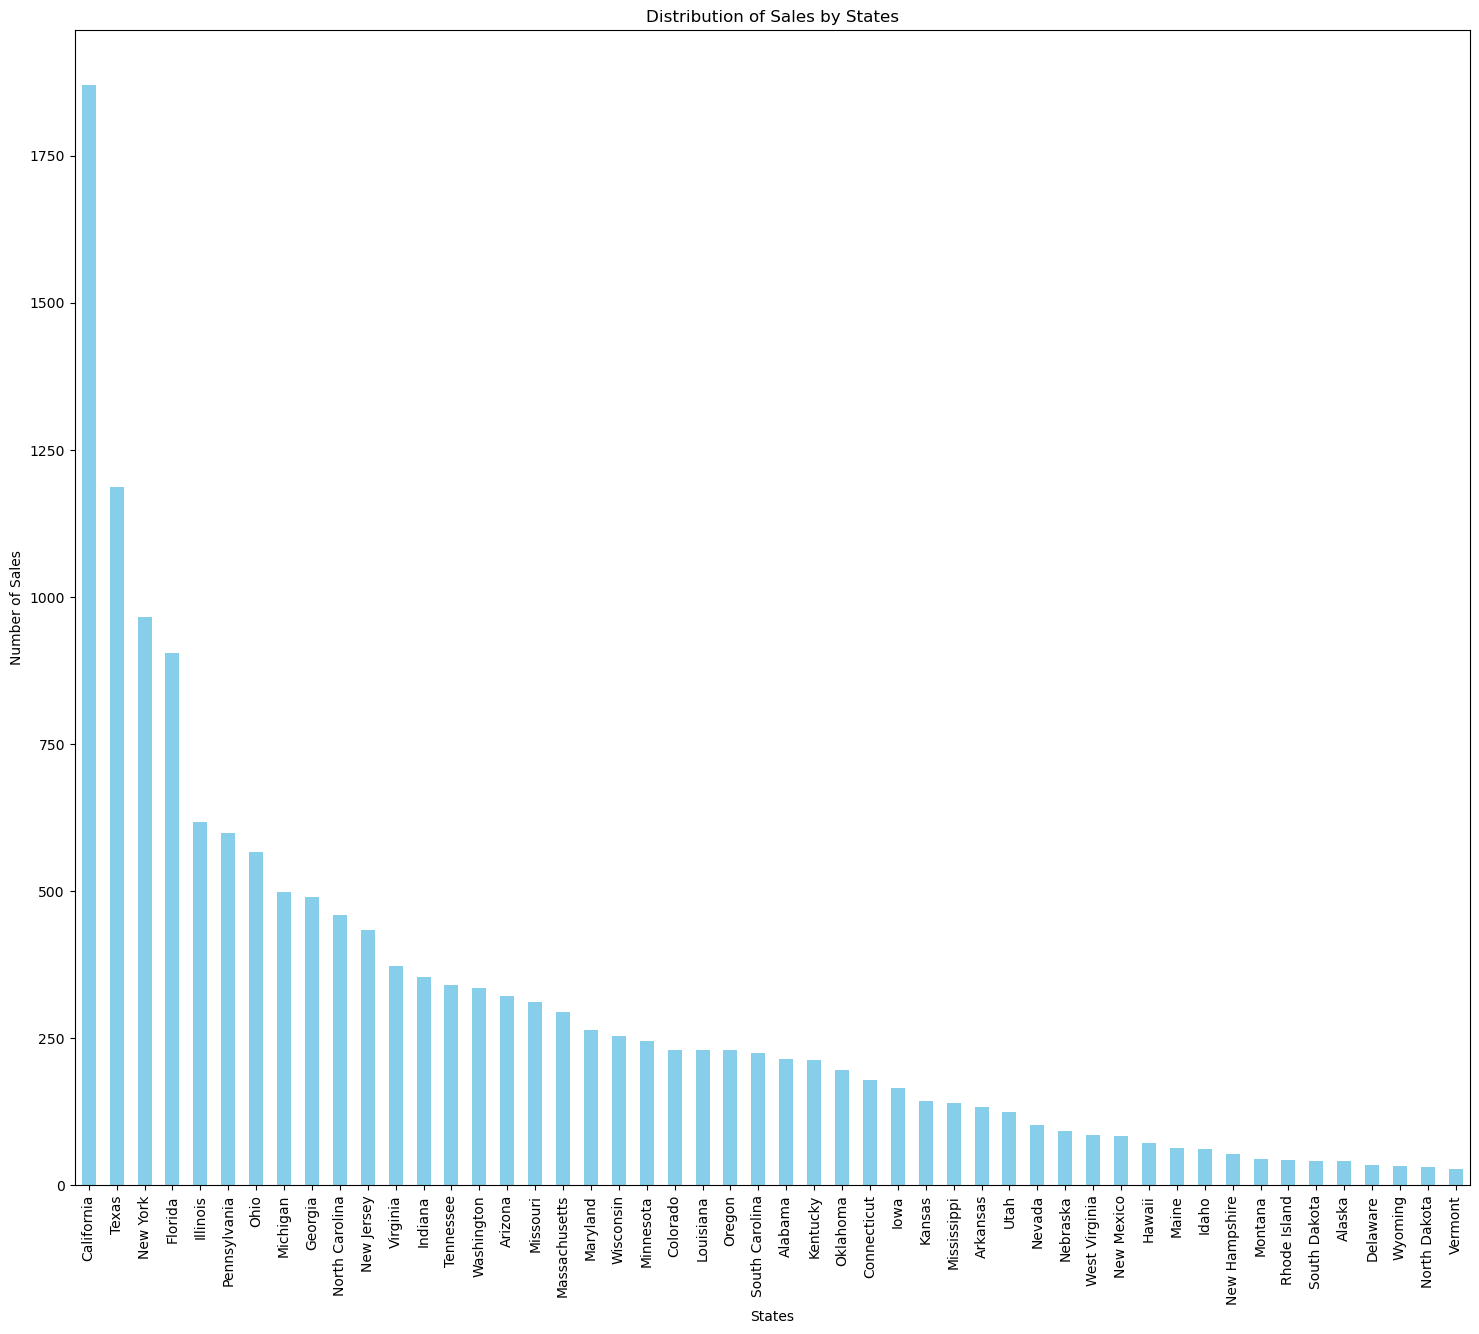

In [18]:
# visualize the no. of sales across states
plt.figure(figsize=(18, 15))
state_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Sales by States')
plt.xlabel('States')
plt.ylabel('Number of Sales')
plt.savefig('Distribution of Sales by States.jpg', dpi = 500)
plt.show()

According to geographical representation of the numbers of sales per state, customers in California purchase 1870 times which is the maximum purchase. On the other hand, customers in Vermont purchase 28 times which is the least. Regional differences in sales are indicated by the significant disparity in the number of purchases made in Vermont and California. Vermont seems to have a lesser level of consumer interaction, whereas California looks to be a large market for our items. 

Business Suggestions 

##### Market Potential and Opportunity in California

The enormous amount of purchases made in California could indicate a greater market potential for our items in terms of demand or consumer base. Thus, this can be a chance for the business to concentrate on growing or making the most of its presence in California. If California is a significant market, the business may choose to investigate ways to increase market penetration and take a greater share of the market. This could include collaborations, promotions, or focused marketing initiatives. 

##### Investigating Challenges in Vermont 

The lower number of purchases in Vermont could also be an opportunity to explore why customer engagement is comparatively lower than other states. Are there challenges in marketing to this region, or is there a specific reason for the lower customer activity? Examining these aspects can offer valuable perspectives for tackling obstacles.

##### Suggestions 

Make sure these data are available when necessary. We can use this information to inform future business strategies. It may be beneficial to allocate resources, marketing efforts, and product development based on the performance and potential of different regions.

### Further Analysis in Calfornia State

What makes the customers in Calfornia want to purchase more? Are the approaches effective? Is it depend on the numbers of visited times to our website? 


In [1]:
california = df[df['state'] == 'California']
california.head(5)

NameError: name 'df' is not defined

<Figure size 2000x1800 with 0 Axes>

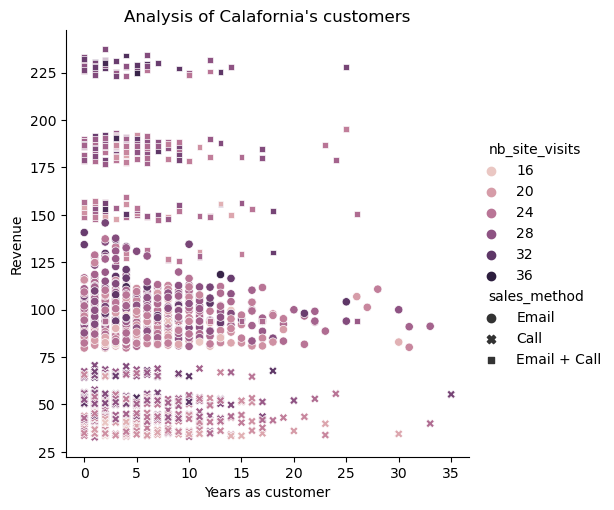

In [20]:
plt.figure(figsize=(20, 18))
sns.relplot(x='years_as_customer', 
            y='revenue', 
            style='sales_method', 
            hue='nb_site_visits', 
            data=california)
plt.title('Analysis of Calafornia\'s customers')
plt.xlabel('Years as customer')
plt.ylabel('Revenue')
plt.savefig('Analysis of Calafornia\'s customers 1.jpg', dpi = 300)
plt.show()

In [21]:
california_customers = california['sales_method'].value_counts()

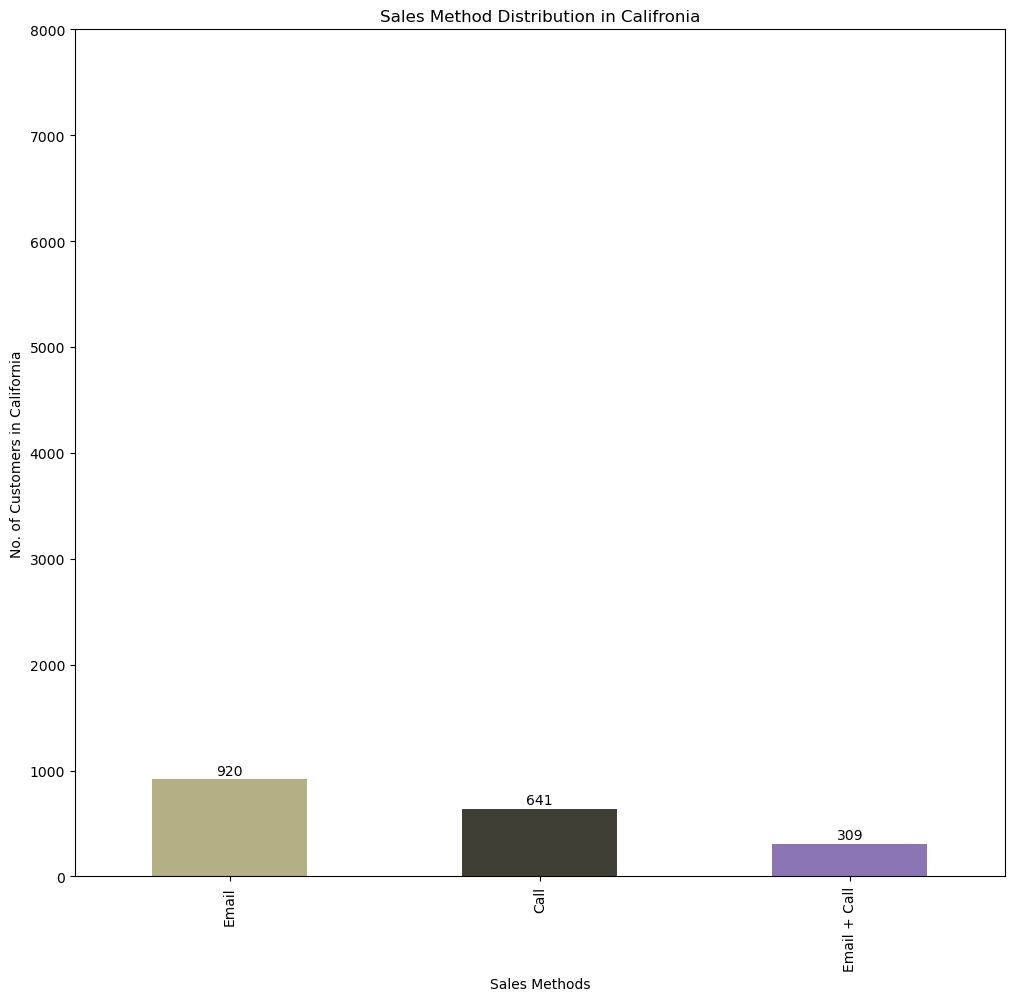

In [22]:
plt.figure(figsize=(12, 11))
ax = california_customers.plot(kind = 'bar', 
                               title='Sales Method Distribution in Califronia', 
                               color = ['#B3B086', '#403F36', '#8A74B3']
                               )
ax.bar_label(ax.containers[0], padding=1)
ax.set_ylim(0, 8000)
ax.set_xlabel('Sales Methods')
ax.set_ylabel('No. of Customers in California')
plt.savefig('Sales Method Distribution in Califronia.jpg', dpi = 300)
plt.show()

According to the visualization, customers engagement is at a significant level in the email approach. However, we got most of our revenue from customers who received both an email and a call. 
The number of site visits does not impact the revenue of the company very much. 
However, the sales strategies surely have significant impact on the customer engagement in California. So, I want to know if there is any difference for all 50 states in the dataset.


<Figure size 1200x800 with 0 Axes>

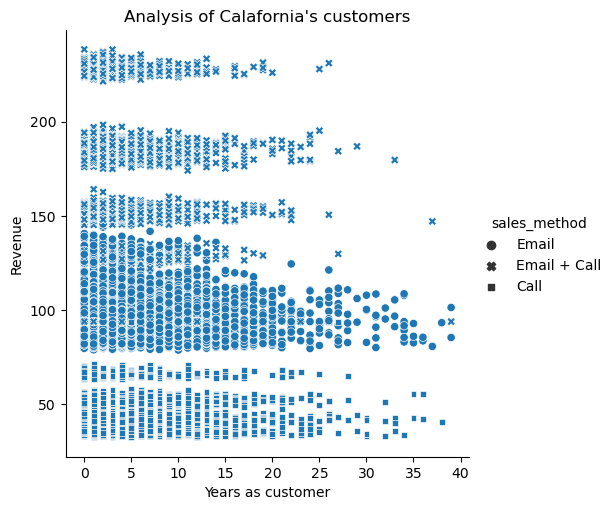

In [23]:
plt.figure(figsize=(12, 8))
sns.relplot(x='years_as_customer', 
            y='revenue', 
            style='sales_method',  
            data=df)

plt.title('Analysis of Calafornia\'s customers')
plt.xlabel('Years as customer')
plt.ylabel('Revenue')
plt.savefig('Analysis of Calafornia\'s customers 2.jpg', dpi = 300)
plt.show()

As we can see that the sales methods certainly affect the revenue in all states. The customers who received both email and call used more money to buy our products than the customers who received only an email or a phone call. However, the customers who received only an email bought our items the most. We should further use the email and call strategy to reach more customers to increase our revenue across all states in the upcoming product sales.

#### Analysis of Sales Rap Request 

How many customers were there for each approach? 

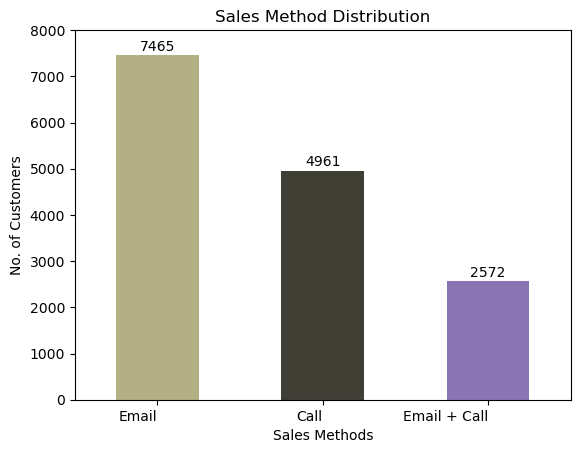

In [31]:
customers = df['sales_method'].value_counts()
ax = customers.plot(kind = 'bar', title='Sales Method Distribution', color = ['#B3B086', '#403F36', '#8A74B3'])
ax.bar_label(ax.containers[0], padding=1)
ax.set_ylim(0, 8000)
ax.set_xlabel('Sales Methods')
ax.set_ylabel('No. of Customers')
# Rotate x-axis labels by 90 degrees
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha='right')
plt.savefig('Sales Method Distribution.jpg', dpi = 300)
plt.show()

In [25]:
df.groupby('sales_method')['revenue'].sum()

sales_method
Call            244515.244602
Email           723321.218749
Email + Call    441039.984951
Name: revenue, dtype: float64

As we mentioned above, the sales methods definitely affect our revenue and the customer engagement across all states. Interestingly, the customers who received both email and call used more money on our products but they did not surpass the number of customers who received only email and their revenue.

What does the spread of the revenue look like overall? And for each method?

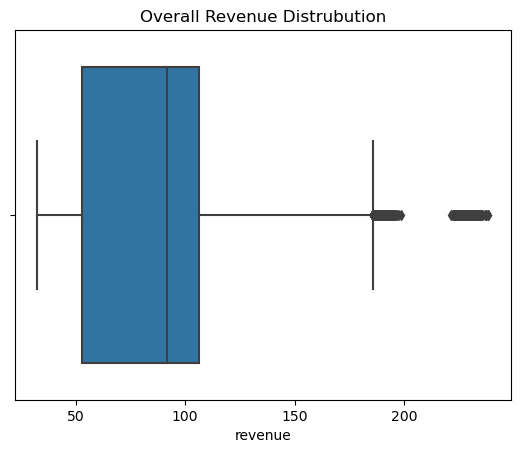

In [26]:
sns.boxplot(x = 'revenue', data = df).set(title='Overall Revenue Distrubution');
plt.savefig('Overall Revenue Distrubution.jpg', dpi = 300)

The Boxplot chart shows that the revenue distribution has a median value near to but less than 100.00. The interquartile range indicates an approximate concentration of revenues per customer between 50.00 and 100.00. The revenues greater than about 180.00 or near 190.00 become outliers.

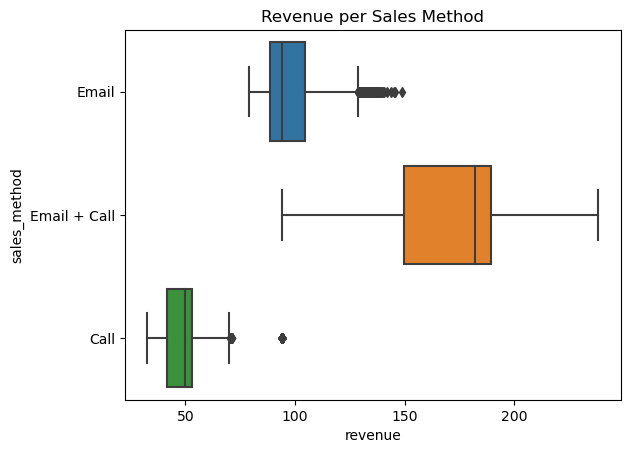

In [27]:
sns.boxplot(x="revenue", y="sales_method", data=df).set_title('Revenue per Sales Method');
plt.savefig('Revenue per Sales Method.jpg', dpi = 300)

When exploring the revenue distribution by each method, we may see the disparities through their medians or even their spread. The Email + Call technique stands out due to its larger distribution and higher median, which is roughly 190.00. The Call technique is distinguished by its small spread and low median of around 50.00. The Email sales approach plays an intermediate role, with a narrow spread and a higher median than the Call method, about 90.00.

#### Was there any difference in revenue over time for each of the methods?

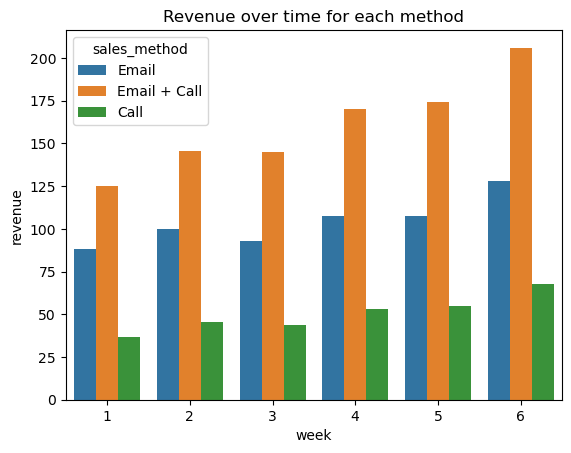

In [28]:
sns.barplot(data=df, 
            x="week", 
            y="revenue", 
            hue="sales_method", errorbar=None).set_title('Revenue over time for each method');
plt.savefig('Revenue over time for each method.jpg', dpi = 300)

The analysis of revenue over time for each approach shows that the Call type sales method grows steadily. In the case of the Email approach, the data show a steadily growing oscillation. However, the Email + Call approach produces a greater increase in income, which is always higher than the Email and Call methods.

According to our findings, the Email + Call approach has the potential to significantly improve our company's income. Customers who received simply an email, on the other hand, desire to participate in our marketing events the most, and their revenue is nearly half that of the Email + Call method. If we want to enhance the income of our company, we must boost customer engagement using the Email + Call method. The Call method takes the most time (30 minutes) but generates the least income of the three. This strategy, I feel, requires a lot of human labor and time but is not financially efficient. On the other hand, the Email approach requires less effort and generates a lot of income. Lastly, the Email + Call strategy persuades many clients to spend more money than other methods. However, client involvement was lower than in the other two approaches, but we still made a good profit. We should keep using the Email and Email + Call approaches. To increase income, we must utilize customer engamgement using the Email + Call strategy.  

#### Business Metric to consider 

As we discussed above, we should consider the number of customers who receieved both an email and a call spent a lot of money on our products. However, this approach does not get over the email approach. In my point of view, if we approach the customers with the email and call method in the upcoming sales, the company revenue can increase and this approach can surpass the email approach. For now, we will consider Average Revenue per User (ARPU) of these two approaches based on the available data. 


In [32]:
# ARPUs 
email_customers = df[df['sales_method'] == 'Email']
email_arpu = df['revenue'].sum() / email_customers.shape[0]
print('Average Revenue per User (Email):', email_arpu.round(2))
email_call_customers = df[df['sales_method'] == 'Email + Call']
email_call_arpu = df['revenue'].sum() / email_call_customers.shape[0]
print('Average Revenue per User (Email + Call):', email_call_arpu.round(2))

Average Revenue per User (Email): 188.73
Average Revenue per User (Email + Call): 547.77


As we can see, the average revenue from Email + Call approach is higher than Email approach. Thus, we should focus the Email + Call approach to increase the revenue of our company.

#### Business Suggesstion

After analyzing the whole data set, we can definitely claim that the customer engagement is declining through time. There are customers since the beginning of the company and do not purchase any item in recent months. Therefore, I believe that the company should focus on the Customer Engagement Index (CEI). The CEI is a composite indicator that reflects total customer involvement based on criteria such as the number of years as a customer, geographical trends, sales strategies, and revenue effect. The CEI may be computed as a weighted mixture of these characteristics, with weights assigned based on their perceived importance.

If they want to boost consumer engagement and income, I recommend the following techniques to monitor. 
1. Establish a regular monitoring plan to track the CEI, such as monthly or quarterly.
2. Design a dashboard that depicts the CEI and its separate components over time. Tools such as charts, graphs, and heatmaps can be employed for successful visualization.
3. Put in place an alert system that alerts key stakeholders when the CEI undergoes substantial changes, allowing for timely inquiry and action.
4. Create CEI benchmarks based on historical data or industry norms. against evaluate performance, and compare current values against benchmarks.
5. Establish a feedback loop in which teams may share insights and feedback on issues impacting the CEI. This encourages ongoing strategy improvement and adaption.